### Accuracy For ALL tried ML Models

**Support Vector Classifier**

For onegrams **94.58**

For onegrams,bigrams **95.46**

For onegrams,bigrams,trigrams **95.24**

**Logistic Regression**

For onegrams **94.43**

For onegrams,bigrams **94.51**

For onegrams,bigrams,trigrams **94.17**

**Naive Bayes**

For onegrams **93.18**

For onegrams,bigrams **94.16**

For onegrams,bigrams,trigrams **94.15**

**Decision Tree Classifier**

For onegrams **89.95**

For onegrams,bigrams **86.57**

For onegrams,bigrams,trigrams **85.65**

**K-Neighbors Classifier**

For onegrams **85.32**

For onegrams,bigrams **88.63**

For onegrams,bigrams,trigrams **88.71**

## Loading Best Model

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
from sklearn.pipeline import Pipeline
import scikitplot as skplt
import pickle

In [2]:
news=pd.read_csv("final.csv")

In [3]:
news.head()

,title,news
0,donald trump sends embarrassing new year eve m...,0
1,drunk bragging trump staffer started russian c...,0
2,sheriff david clarke becomes internet joke thr...,0
3,trump obsessed even obama coded website image,0
4,pope francis called donald trump christmas speech,0


In [4]:
X_train, X_test, y_train, y_test = train_test_split(news["title"], news['news'], test_size=0.25, random_state=42)

In [5]:
pipe2 = Pipeline([('vectorizer', TfidfVectorizer(ngram_range=(1, 2))),
                 ('feature_selector', SelectFromModel(LinearSVC())),
                 ('classifier', LinearSVC())])

In [6]:
model2 = pipe2.fit(X_train, y_train)
prediction2 = model2.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction2)*100,2)))

accuracy: 95.27%


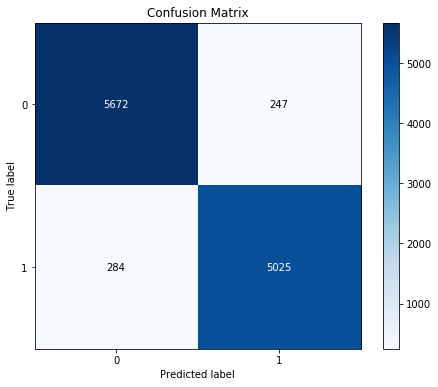

In [7]:
skplt.metrics.plot_confusion_matrix(y_test,prediction2,figsize=(8,6))

In [8]:
print(classification_report(y_test,prediction2))

              precision    recall  f1-score   support

           0       0.95      0.96      0.96      5919
           1       0.95      0.95      0.95      5309

    accuracy                           0.95     11228
   macro avg       0.95      0.95      0.95     11228
weighted avg       0.95      0.95      0.95     11228



# Making Pkl File

In [9]:
with open('final_model_selected_features.pkl', 'wb') as handle:
    pickle.dump(pipe2, handle, protocol=pickle.HIGHEST_PROTOCOL)

# Reduction in Feature Space

In [10]:
len(pipe2['vectorizer'].get_feature_names())

178111

In [11]:
len(pd.Series(pipe2['vectorizer'].get_feature_names())[pipe2['feature_selector'].get_support()])

64893